## Вычисление числа Фибоначчи

Медленный вариант с использованием рекурсии. Функция `fib1()` вычисляет число Фибоначчи для переданного `n` за экспоненциальное время.

In [1]:
def fib1(n):
    assert n >= 0
    return n if n <= 1 else fib1(n-1) + fib1(n - 2)

old_fib1 = fib1
%time print(fib1(33))

3524578
Wall time: 1.75 s


Ускорим вычисления за счет сохранения уже рассчитанных значений и сохранения из в словарь `cache`

In [2]:
def fib1(n):
    assert n >= 0
    if n not in cache:
        cache[n] = n if n <= 1 else fib1(n-1) + fib1(n - 2)
    return cache[n]

cache = {}
%time print(fib1(1100))

34428592852410271940083613070919630635781894724017874396545964292826864597491403229723364359749415183436491553996529359881593653825629442519718308678951540824183325844045884746598230684751416672062124540392876245684047939604503325
Wall time: 1e+03 µs


Избавимся от глобальной переменной `cache` создав функцию-декоратор `memo`, которая создает локальную переменную `cache` и потом запоминает результаты вызова функции `fib2()` в `cache`

In [3]:
def memo(f):
    cache = {}
    def inner(n):
        assert n >= 0
        if n not in cache:
            cache[n] = f(n)
        return cache[n] 
    return inner

Превратим за счет декоратора и использования `cache` функцию `fib1()` в `fib2()`

In [4]:
fib1 = memo(old_fib1)
%time fib1(80)

Wall time: 0 ns


23416728348467685

На практике декоратор `memo` можно не кодить самостоятельно а использовать его аналог `lru_cache` из стандартной библиотеки python `functools`

In [5]:
from functools import lru_cache

In [7]:
fib1 = lru_cache(maxsize=None)(old_fib1)
%time fib1(800)

Wall time: 0 ns


69283081864224717136290077681328518273399124385204820718966040597691435587278383112277161967532530675374170857404743017623467220361778016172106855838975759985190398725

Т.к. `fib1()` использует рекурсивные вызовы, а глубина рекурсии в python ограничена, определить значение большого числа Фибоначчи, например, для n=8000, при помощи `fib1()` будет невозможно. Используем функцию с итерированием.

In [8]:
def fib3(n):
    assert n >= 0
    f0, f1 = 0, 1
    for i in range(n-1):
        f0, f1 = f1, f0 + f1
    return f1

In [9]:
%time fib3(8000)

Wall time: 1.99 ms


3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

Напишем функцию `timed` которая рассчитывает время исполнения переданной функции при заданных аргументах

In [10]:
import time

In [12]:
def timed(f, *args, n_iter=100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

In [17]:
timed(fib3, 800)

5.7599999990998185e-05

Визуализируем время выполнения `fib1()` и 'fib3()'

In [15]:
from matplotlib import pyplot as plt

In [19]:
def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label = f.__name__)
        plt.legend()
        plt.grid(True)

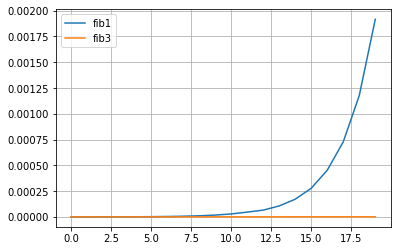

In [23]:
fib1 = old_fib1
compare([fib1, fib3], list(range(20)))